## Ames Housing Data

We are a group of home improvement consultants that provide suggestions on how to refurbish the houses in selected neighborhoods in Ames, Iowa, including selecting the best features for homeowners to renovate, in order to improve the value of their homes in a cost-effective way.

To help predict which feature to improve in order to increase housing price, I will create a linear regression model based on the Ames Housing Dataset. 

The problem statement is -

**In order to let seller sell their property for higher price in the future, which housing features to improve?**

Besides, I also will find out which model can give the most accurate predictions of sales price with the selected features.

### Datasets:
The Ames Housing dataset contains 2000 entries of properties with 80 over descrete, nominal & ordinal features in Ames, Iowa. The properties were sold between 2006-2010.
The detailed description is shown in this link below:
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

### Tables of content:
1. Abstract
2. Import and loading data
3. Exploratory data analysis
4. Data cleaning
5. Feature Engineering
6. Data Visualization
7. Data Modelling
8. Model fitting & Evaluation
9. LINE assumption
10. Conclusions & Recommendations


### 1. Abstract
Overview:

1) Exploratory Data Analysis:

Numerical features - a heatmap and correlation coefficients are used to show the linear relationship.

Categorical features - box plots are used to the relationship between Sale Price and categories.

2) Feature Engineering: 

Amplify signal of categorical data for better accuracy when fit in model.

3) Data Modelling: 

Linear Regression, LASSO and Ridge models are used for comparison. 

Lasso was used to select and narrow down features.
Models were evaluated and selected based on RMSE score. 
Ridge model is chosen as final model.

4) LINE assumption

My model is able to predict housing prices with an error of $23,910.

The top 5 features for sellers to achieve the highest selling price -

- Overall quality and living area 

- Basement square feet

- Lot size 

- Excellent exterior quality

- Excellent kitchen quality            

However, not all the features listed above are able to be changed, eg: basement square feet. We can only pick those features which are improvable like exterior quality and kitchen quality. Since 3 out of 5 features are not changeable, I have extended the list to show features which have $600 coefficient and above to maximise the ROI.

### 2. Import and loading data

In [1]:
#libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

In [2]:
#import train data
train = pd.read_csv('./datasets/train.csv')

In [3]:
#import test data
test= pd.read_csv('./datasets/test.csv')

### 3. Exploratory Data Analysis

In [4]:
#to understand the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [5]:
train.shape

(2051, 81)

In [6]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [7]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1.444749e+03,8.508383e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03


In [10]:
test.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Feature     object
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 80, dtype: object

In [11]:
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

#### Observation:
The data given is quite detailed and robust despite having some missing data. 
Before data analysis, I shall clean and standardize the data

### 4. Data Cleaning 
a. Column name formatting

b. Dealing with missing data
 - numerical features with 'NA' will be set to 0
 - categorical features with 'NA' will be set to 'None'
 
c. Identify and fixing outliers 


#### a. Column name formatting

In [13]:
train.columns = [i.lower().replace(' ','_') for i in train.columns]

In [14]:
test.columns = [i.lower().replace(' ','_') for i in test.columns]

#### b. Dealing with missing data

In [15]:
#numerical features with 'NA' will be set to 0
#categorical features with 'NA' will be set to 'None'

for col in train:
    if type(train[col])== 'int64' or 'float64':
        train[col] = train[col].fillna(value=0)
    else:
        train[col] = train[col].fillna(value='None')

In [16]:
train.isnull().sum().sum()

0

In [17]:
for col in test:
    if type(test[col])== 'int64' or 'float64':
        test[col] = test[col].fillna(value=0)
    else:
        test[col] = test[col].fillna(value='None')

In [18]:
test.isnull().sum().sum()

0

#### c.  Identify and fixing outliers 

In [19]:
#identify outlier under garage year built
train[train['garage_yr_blt']>2010][['year_built','garage_yr_blt']]

,year_built,garage_yr_blt
1699,2006,2207.0


In [20]:
#assuming the the outlier is typo and change to 2007
train.loc[1699,'garage_yr_blt'] = 2007


In [21]:
# identify outliers in basement area which is unusual 
train[train['total_bsmt_sf']>4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,0,IR3,Bnk,...,0,480,Gd,0,0,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,0,IR1,Bnk,...,0,0,0,0,Elev,17000,10,2007,New,183850


In [22]:
# remove the outliers
train.drop(train[train['total_bsmt_sf']>3000].index,inplace=True)

In [23]:
# identify outliers in lot area which is unusual
train[train['lot_area']>60000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
471,2116,906426060,50,RL,0.0,159000,Pave,0,IR2,Low,...,0,0,0,0,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,0.0,115149,Pave,0,IR2,Low,...,0,0,0,0,0,0,6,2007,WD,302000
1854,2767,906475200,20,RL,62.0,70761,Pave,0,IR1,Low,...,0,0,0,0,0,0,12,2006,WD,280000


In [24]:
# remove the outliers
train.drop(train[train['lot_area']>60000].index,inplace=True)

In [25]:
# identify outliers in total rooms above grade
train[train['totrms_abvgrd']>13]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
858,2195,909176080,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,...,0,0,0,0,0,0,3,2007,WD,200000


In [26]:
#remove the outliers
train.drop(858,inplace=True)

### 5. Feature Engineering
#### a. Column Standardization

In [27]:
# Convert to age at sale to standardize against different years sold
train['age_at_sale'] = train['yr_sold'] - train['year_built']

In [28]:
test['age_at_sale'] = test['yr_sold'] - test['year_built']

In [29]:
#convert to age of remodel
train['age_of_remod'] = train['yr_sold'] - train['year_remod/add']

In [30]:
test['age_of_remod'] = test['yr_sold'] - test['year_remod/add']

In [31]:
# create function to standardize columns
def standardize_columns(df):
    df['age_at_sale'] = df['yr_sold'] - df['year_built'] # to find out the age at sale 
    df['baths'] = df['bsmt_full_bath'] + df['full_bath'] + (df['bsmt_half_bath']/2) + (df['half_bath']/2) #create baths to combine all column for bathroom
    df['finished_basement_sqft'] = df['bsmtfin_sf_1'] + df['bsmtfin_sf_2'] #combining basment sq footage 
    df.drop(columns=['bsmt_full_bath', 'full_bath', 
                     'bsmt_half_bath','half_bath', 
                     'bsmtfin_sf_1', 'bsmtfin_sf_2', 
                     '1st_flr_sf', '2nd_flr_sf', 
                     'total_bsmt_sf', 'bsmt_unf_sf' ], inplace=True) #remove extra columns after creating new columns
    df['overall_qual_x_gr_liv_area'] = df['overall_qual']*df['gr_liv_area'] #feature between quality and living area
    df['street'] = df['street'].map({'Pave': 1, 'Grvl': 0}) #changing pave and grvl to 1 and 0
    df['has_central_air'] = df['central_air'].map({'Y': 1, 'N': 0})  #change central air as Yes =1 or No=0
    df['newly_renovated'] = df['year_remod/add'].map(lambda reno: 1 if reno >= 2007 else 0) #to find out newly renovate unit will cost higher
    df['functionality'] = df['functional'].map({
    'Maj2': 'deducted',
    'Mod': 'deducted',                        
    'Min2':'deducted', 
    'Maj1': 'deducted',
    'Min1': 'deducted',
    'Sev': 'severely_damaged',
    'Sal': 'salvage_only',
    'Typ': 'typical'}) #for easier visibility and grouping
    df['building_type'] = df['bldg_type'].map({
    '2fmCon': "two_family_conversion",
    'Twnhs' : 'townhouse_inside_unit',
    'TwnhsE': 'townhouse_end_unit',
    '1Fam': 'single_family',
    'Duplex': 'duplex'}) #for easier visibility and grouping
    

In [32]:
#apply function on train data
standardize_columns(train) 

In [33]:
standardize_columns(test)

#### b. Convert categorical to numerical by getting dummies

In [34]:
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)

In [35]:
#fill up missing columns to standardise both datasets

missing_cols = set(train_dummies.columns ) - set(test_dummies.columns)
    
for c in missing_cols:
    test_dummies[c] = 0
        
test_dummies = test_dummies[train_dummies.columns]

### 6. Data Visualization
#### Numerical features

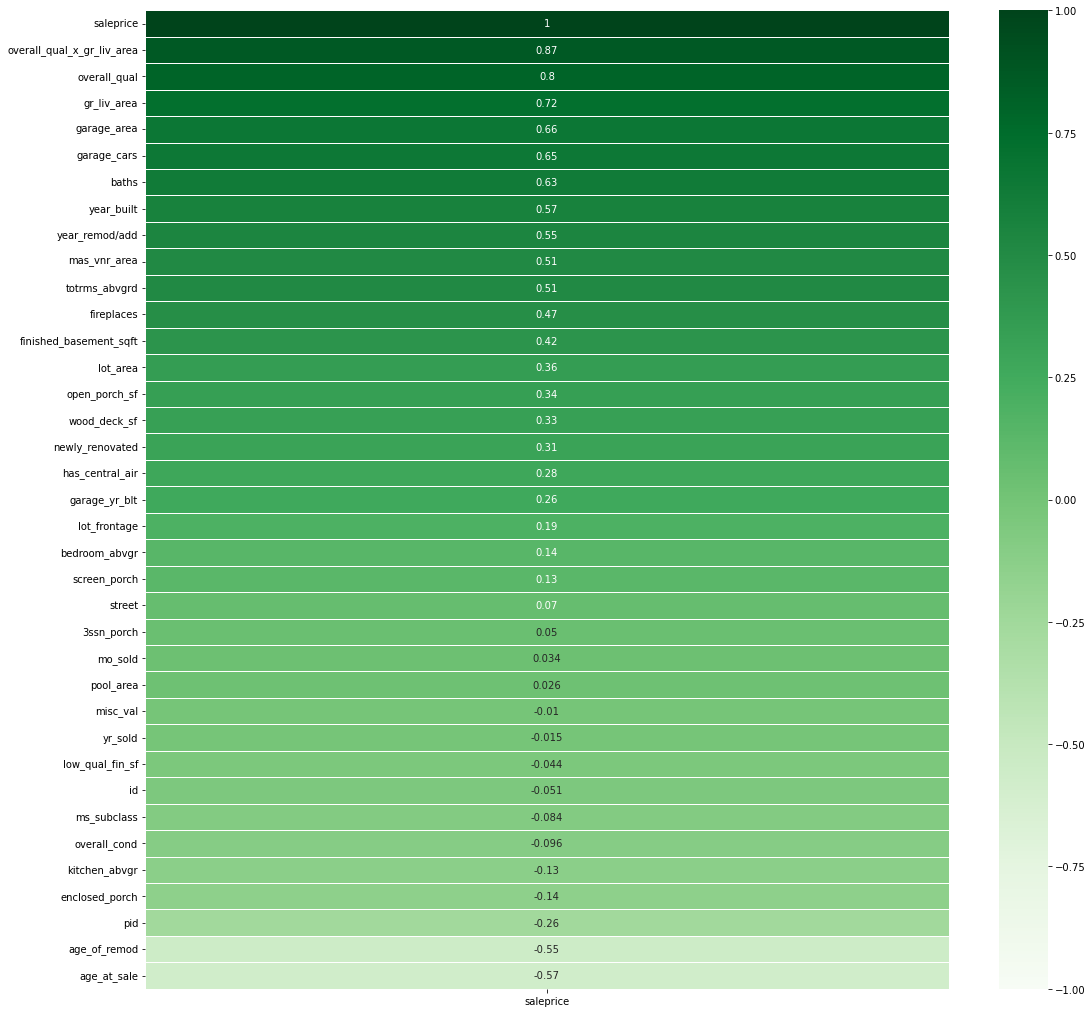

In [36]:
#to find out the highest correlation between numerical features and sales price
plt.figure(figsize = (18,18))
sns.heatmap(train.corr()[['saleprice']].sort_values(by=['saleprice'], ascending = False),
            annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='Greens');

In [37]:
#filter the columns with positive correlation more than 0.15
numerical_correlated_features = (train.corr()[['saleprice']].sort_values('saleprice', ascending= False)[:25]).index.tolist()
numerical_correlated_features

['saleprice',
 'overall_qual_x_gr_liv_area',
 'overall_qual',
 'gr_liv_area',
 'garage_area',
 'garage_cars',
 'baths',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'totrms_abvgrd',
 'fireplaces',
 'finished_basement_sqft',
 'lot_area',
 'open_porch_sf',
 'wood_deck_sf',
 'newly_renovated',
 'has_central_air',
 'garage_yr_blt',
 'lot_frontage',
 'bedroom_abvgr',
 'screen_porch',
 'street',
 '3ssn_porch',
 'mo_sold']

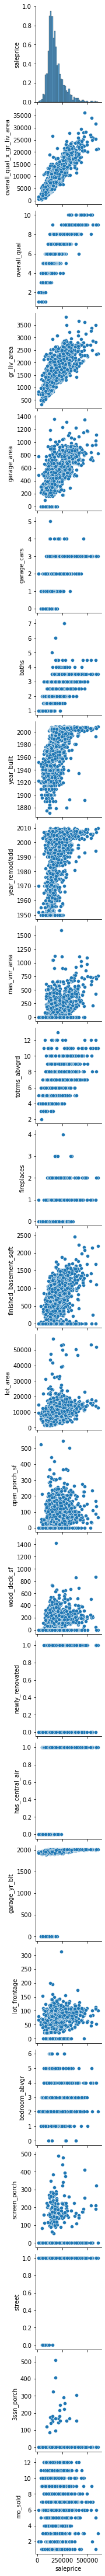

In [38]:
#plotting scatterplots of correlated features
sns.pairplot(train, y_vars=numerical_correlated_features, x_vars=['saleprice'])

Consider that coeficient 0.55 shows that the strong correlation, these are the features which are strongly related:

1. overall_qual (overall material and finish of the house)
2. Overall_qual_x_gr_liv_area (feature between overall material & ground living area)
3. gr_liv_area  (Ground living area)
4. garage_area  
5. garage_cars  (Garage area in car capacity)
6. baths 

The scatter plot also shows positive correlation to confirm the correlation heatmap 

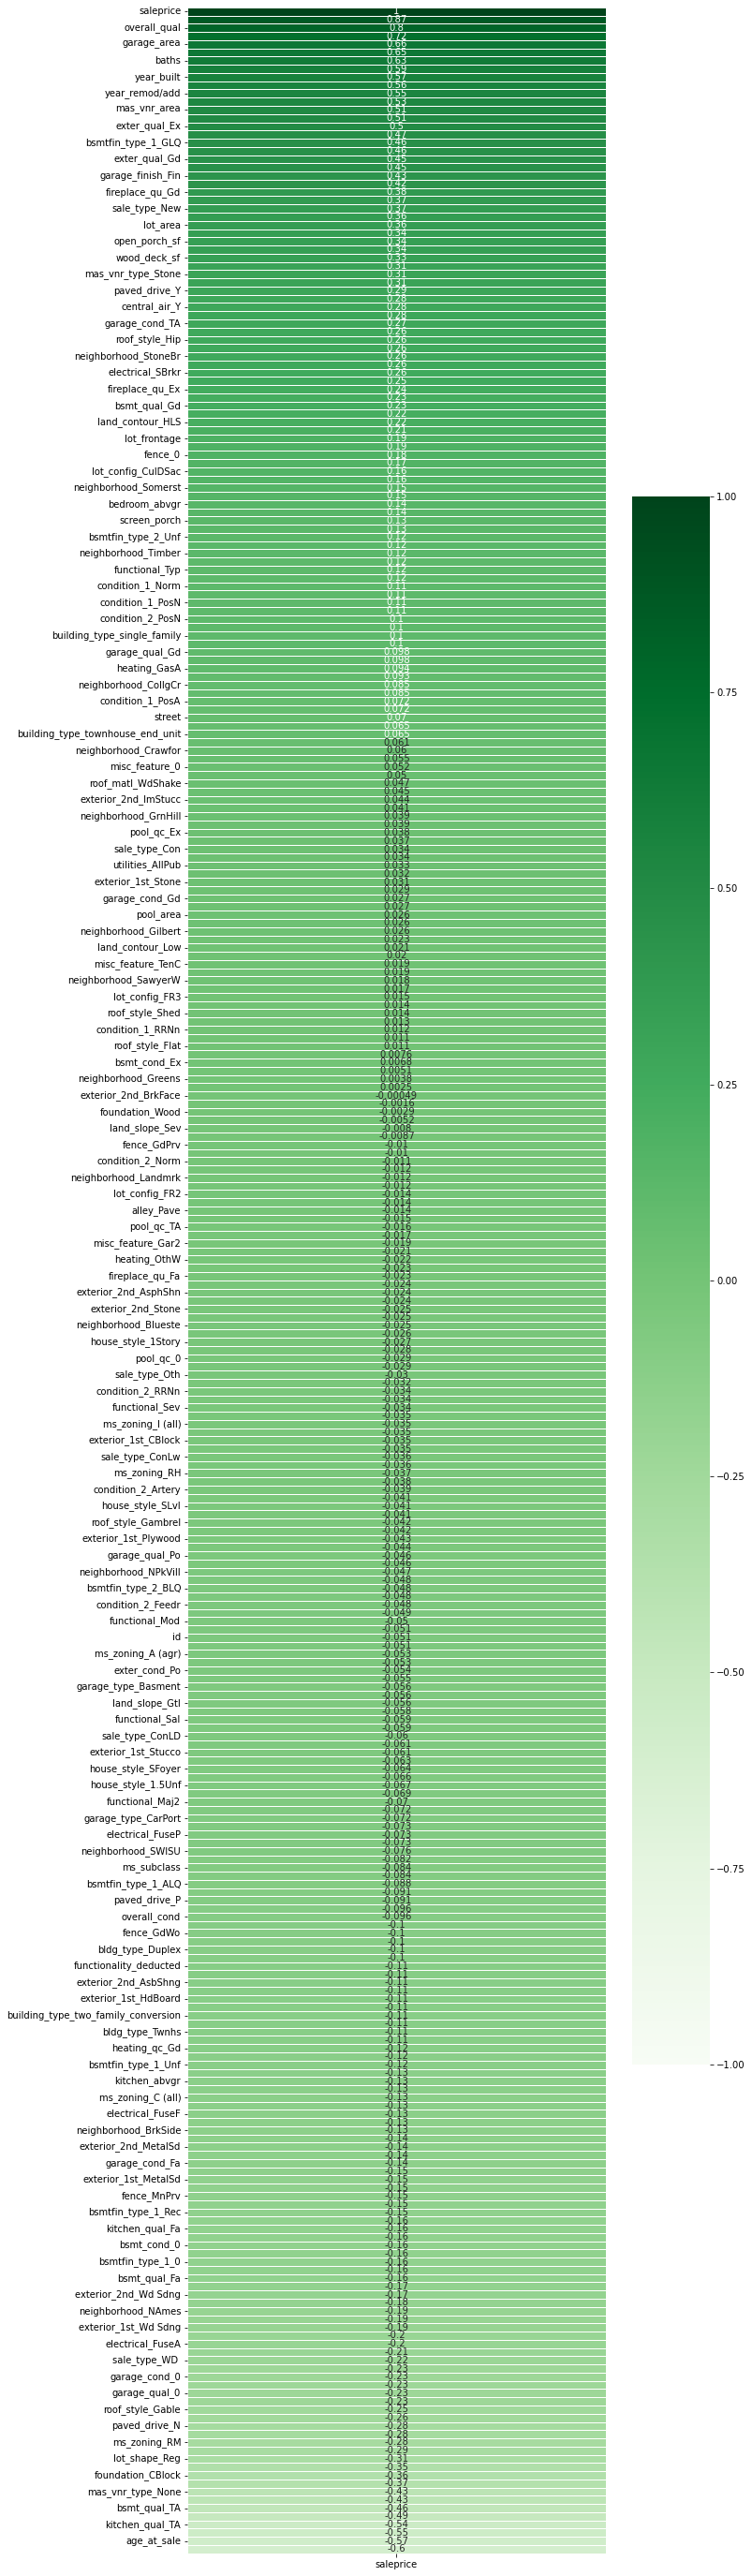

In [39]:
#to find out the highest correlation with sales price column only for dummies dataframe
plt.figure(figsize = (10,50))
sns.heatmap(train_dummies.corr()[['saleprice']].sort_values(by=['saleprice'], ascending = False),
            annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='Greens');

In [40]:
#selecting columns with positive correlation more than 0.15
correlated_features = (train_dummies.corr()[['saleprice']].sort_values('saleprice', ascending= False)[:25]).index.tolist()
correlated_features

['saleprice',
 'overall_qual_x_gr_liv_area',
 'overall_qual',
 'gr_liv_area',
 'garage_area',
 'garage_cars',
 'baths',
 'bsmt_qual_Ex',
 'year_built',
 'kitchen_qual_Ex',
 'year_remod/add',
 'foundation_PConc',
 'mas_vnr_area',
 'totrms_abvgrd',
 'exter_qual_Ex',
 'fireplaces',
 'bsmtfin_type_1_GLQ',
 'heating_qc_Ex',
 'exter_qual_Gd',
 'neighborhood_NridgHt',
 'garage_finish_Fin',
 'finished_basement_sqft',
 'fireplace_qu_Gd',
 'bsmt_exposure_Gd',
 'sale_type_New']

In [41]:
#merging of feature list and remove duplicates
correlated_features = list(set(correlated_features + numerical_correlated_features))
correlated_features

['exter_qual_Ex',
 'finished_basement_sqft',
 'garage_finish_Fin',
 'mas_vnr_area',
 'fireplaces',
 'year_built',
 'wood_deck_sf',
 'gr_liv_area',
 'garage_yr_blt',
 'garage_area',
 'screen_porch',
 'fireplace_qu_Gd',
 'lot_frontage',
 'lot_area',
 'overall_qual_x_gr_liv_area',
 'street',
 'kitchen_qual_Ex',
 'mo_sold',
 'bsmt_qual_Ex',
 'bedroom_abvgr',
 'neighborhood_NridgHt',
 'exter_qual_Gd',
 '3ssn_porch',
 'overall_qual',
 'garage_cars',
 'foundation_PConc',
 'sale_type_New',
 'bsmtfin_type_1_GLQ',
 'totrms_abvgrd',
 'year_remod/add',
 'newly_renovated',
 'has_central_air',
 'saleprice',
 'bsmt_exposure_Gd',
 'heating_qc_Ex',
 'baths',
 'open_porch_sf']

#### Categorical features

In [42]:
#to filter out categorical features
categorical_features = []
for x in correlated_features:
    if x.islower() == False:
        categorical_features.append(x)
        
categorical_features
        

['exter_qual_Ex',
 'garage_finish_Fin',
 'fireplace_qu_Gd',
 'kitchen_qual_Ex',
 'bsmt_qual_Ex',
 'neighborhood_NridgHt',
 'exter_qual_Gd',
 'foundation_PConc',
 'sale_type_New',
 'bsmtfin_type_1_GLQ',
 'bsmt_exposure_Gd',
 'heating_qc_Ex']

In [43]:
def boxplots(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = dataframe.groupby(column).mean()['saleprice'].sort_values().index
        
        sns.boxplot(dataframe[column],dataframe['saleprice'],order = names, ax = ax[i]) 
        
        ax[i].set_title(f' " saleprice" vs "{column}"', fontsize =18)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

/Users/guiwaisiong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/guiwaisiong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/guiwaisiong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

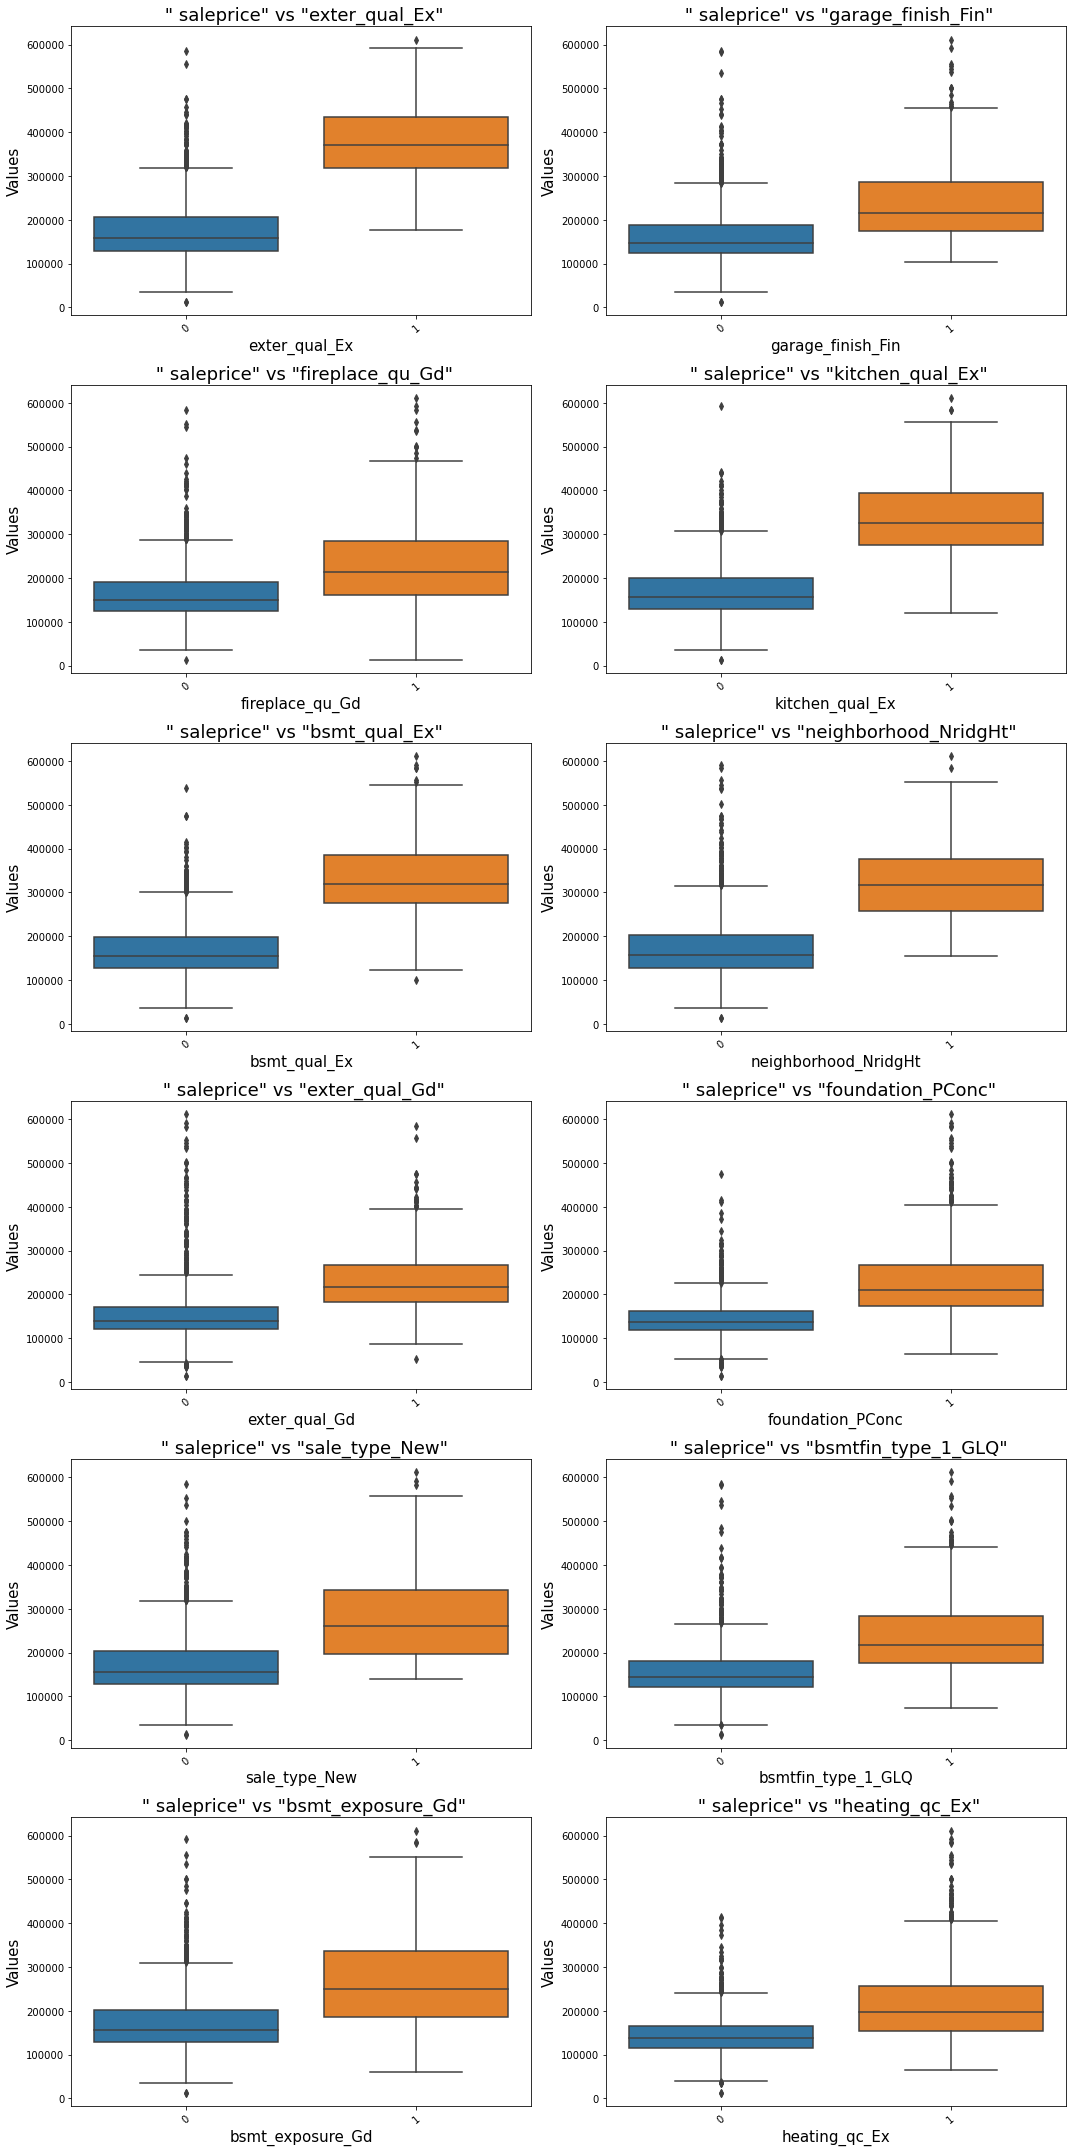

In [44]:
boxplots(train_dummies, categorical_features)

These boxplots shows the linear relationship of saleprice and categorical features. All categorical features are kept.

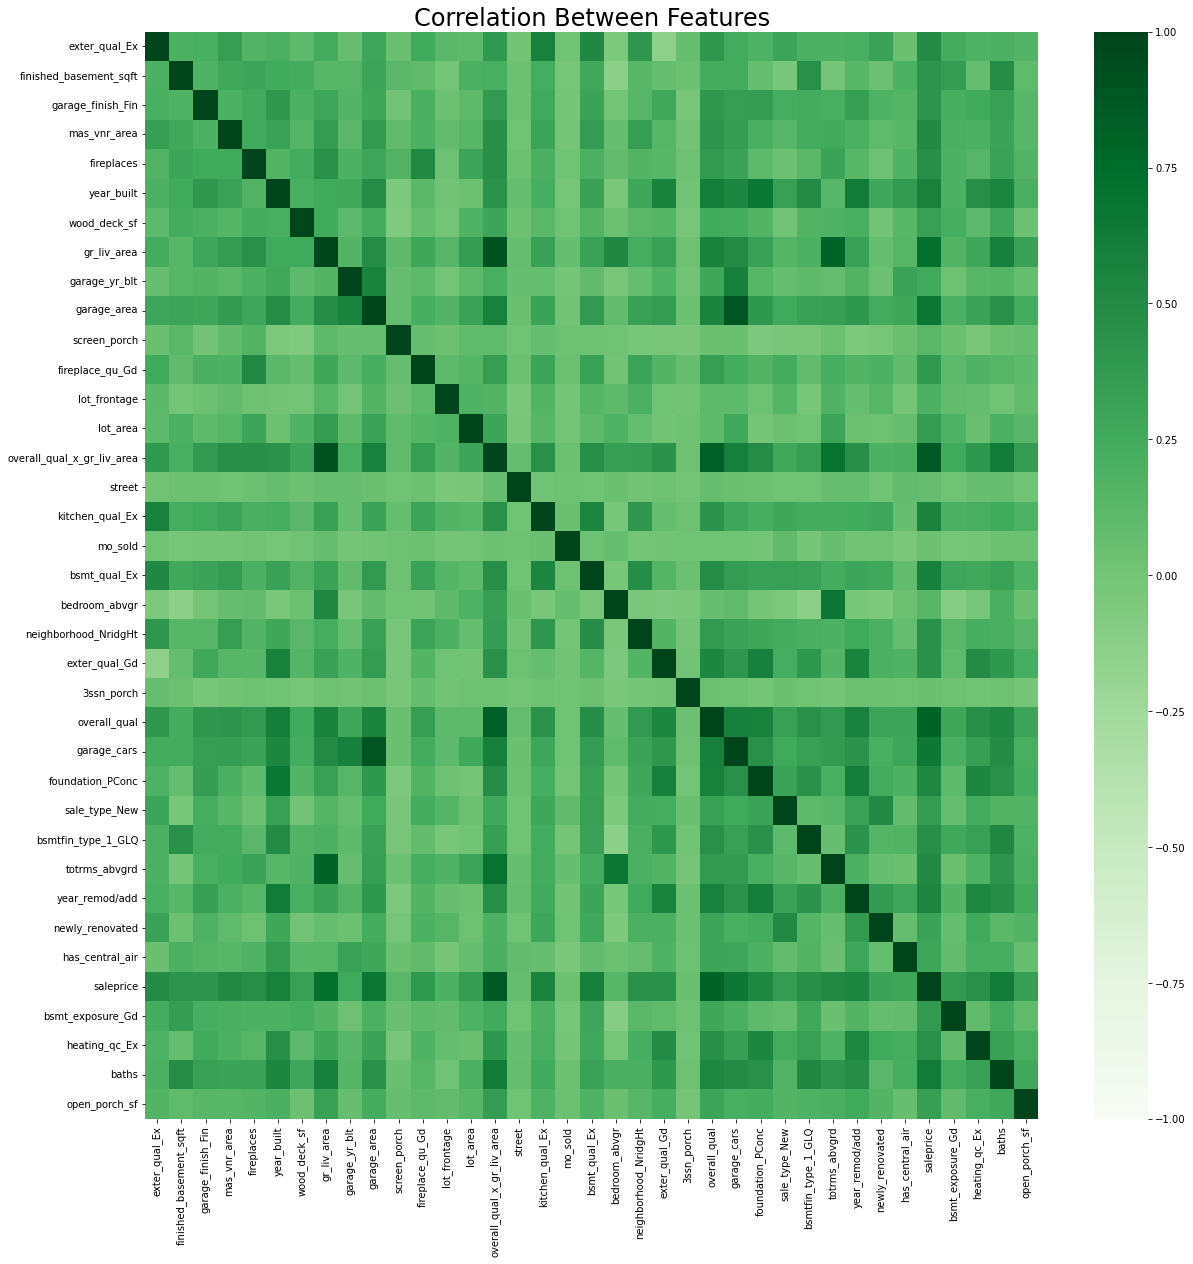

In [45]:
#plot correlation between features 
plt.figure(figsize=(20, 20))
sns.heatmap(train_dummies[correlated_features].corr(),
           cmap='Greens',
           vmin=-1)
plt.title("Correlation Between Features", fontsize=24);

There are colinearity observed between these features:
1. Garage cars and Garage area

2. Total rooms above grade and above grade living area

In order to amplify signal for selected categorial variables (above 0.5 correlation) with sale price to reflect better in linear regression, I create an interaction feature. 

In [46]:
def amplify_feature(feature_list):
    list_feat = []
    for x in feature_list:
        train_dummies[x +"1"] = train_dummies[x] * train_dummies[x]
        test_dummies[x + "1"] = test_dummies[x] * test_dummies[x]
        list_feat.append( x + "1")
        list_features= [x + "1" if i== x else i for i in correlated_features]
    return list_feat

In [47]:
amplified = amplify_feature(categorical_features)
amplified

['exter_qual_Ex1',
 'garage_finish_Fin1',
 'fireplace_qu_Gd1',
 'kitchen_qual_Ex1',
 'bsmt_qual_Ex1',
 'neighborhood_NridgHt1',
 'exter_qual_Gd1',
 'foundation_PConc1',
 'sale_type_New1',
 'bsmtfin_type_1_GLQ1',
 'bsmt_exposure_Gd1',
 'heating_qc_Ex1']

In [48]:
#remove un-amplified categorical features and insert new ones to feature list
new_list = []

for i in correlated_features:
    if i in categorical_features:
        correlated_features.remove(i)


In [49]:
correlated_features_without_amplify = [item for item in correlated_features if item not in categorical_features]

In [50]:
new_correlated_features = correlated_features_without_amplify + amplified 


In [51]:
new_correlated_features 

['finished_basement_sqft',
 'mas_vnr_area',
 'fireplaces',
 'year_built',
 'wood_deck_sf',
 'gr_liv_area',
 'garage_yr_blt',
 'garage_area',
 'screen_porch',
 'lot_frontage',
 'lot_area',
 'overall_qual_x_gr_liv_area',
 'street',
 'mo_sold',
 'bedroom_abvgr',
 '3ssn_porch',
 'overall_qual',
 'garage_cars',
 'totrms_abvgrd',
 'year_remod/add',
 'newly_renovated',
 'has_central_air',
 'saleprice',
 'baths',
 'open_porch_sf',
 'exter_qual_Ex1',
 'garage_finish_Fin1',
 'fireplace_qu_Gd1',
 'kitchen_qual_Ex1',
 'bsmt_qual_Ex1',
 'neighborhood_NridgHt1',
 'exter_qual_Gd1',
 'foundation_PConc1',
 'sale_type_New1',
 'bsmtfin_type_1_GLQ1',
 'bsmt_exposure_Gd1',
 'heating_qc_Ex1']

In [52]:
features = [col for col in new_correlated_features if col != 'saleprice']
len(features)

36

In [53]:
X = train_dummies[features]
y = train_dummies['saleprice']

In [54]:
y.mean()

180961.07149853086

### 7. Data Modelling
#### Train, Test, Split

In [55]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=42)

In [56]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_validate_scaled = ss.transform(X_validate)

#### Instantiate Model

In [57]:
lr = LinearRegression()

In [58]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [59]:
lasso = LassoCV(n_alphas=200)

#### Cross Validation 

In [60]:
#LR estimate test RMSE using cross val
lr_cv_score_RMSE = -cross_val_score(lr, X_train_scaled, y_train, cv = 5, scoring= 'neg_root_mean_squared_error').mean()
lr_cv_score_RMSE

23930.204472323658

In [61]:
#Ridge estimate RMSE
ridge_RMSE_score = -cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
ridge_RMSE_score

23940.926686483046

In [62]:
#lasso estimate RMSE
lasso_RMSE_score = -cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
lasso_RMSE_score

24013.754680566995

### 8. Model fitting & Evaluation
#### Linear Regression

In [63]:
lr.fit(X_train_scaled,y_train)

print("Training RMSE(LR) " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_scaled)))))
print("Testing RMSE(LR) " + str(np.sqrt(mean_squared_error(y_validate,lr.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (LR)" + str((lr_cv_score_RMSE)))

Training RMSE(LR) 22967.118947098017
Testing RMSE(LR) 22428.967569989414
Estimate of Testing RMSE (LR)23930.204472323658


#### Ridge

In [64]:
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [65]:
ridge.alpha_

0.7000000000000001

In [66]:
print("Training RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_scaled)))))
print("Testing RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_validate,ridge.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (Ridge) " + str((ridge_RMSE_score)))

Training RMSE(Ridge) 22968.194746784735
Testing RMSE(Ridge) 22440.69424317517
Estimate of Testing RMSE (Ridge) 23940.926686483046


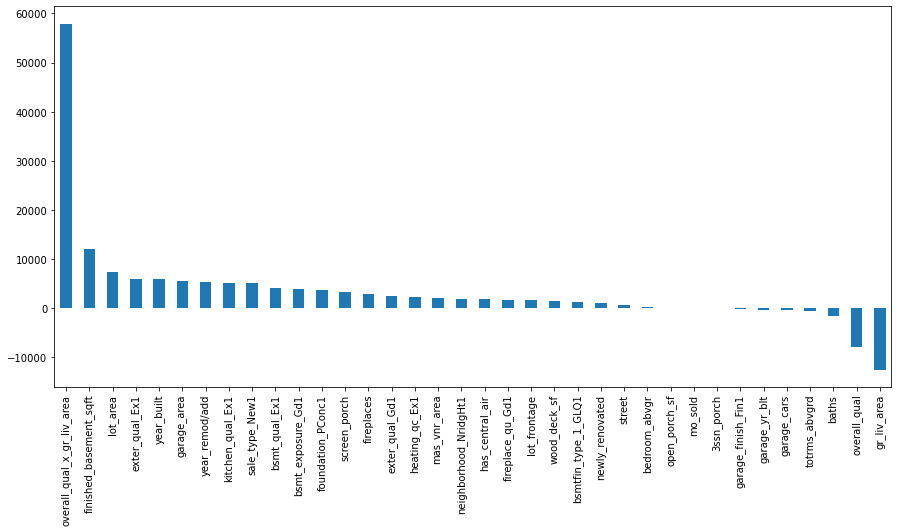

In [67]:
#to see how the coefficients have been regularized in ridge
pd.Series(ridge.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 7));

#### LASSO

In [68]:
lasso.fit(X_train_scaled,y_train)

LassoCV(n_alphas=200)

In [69]:
print("Training RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled)))))
print("Testing RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_validate,lasso.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (Lasso)" + str((lasso_RMSE_score)))

Training RMSE(Lasso) 22992.12369901397
Testing RMSE(Lasso) 22457.827871846835
Estimate of Testing RMSE (Lasso)24013.754680566995


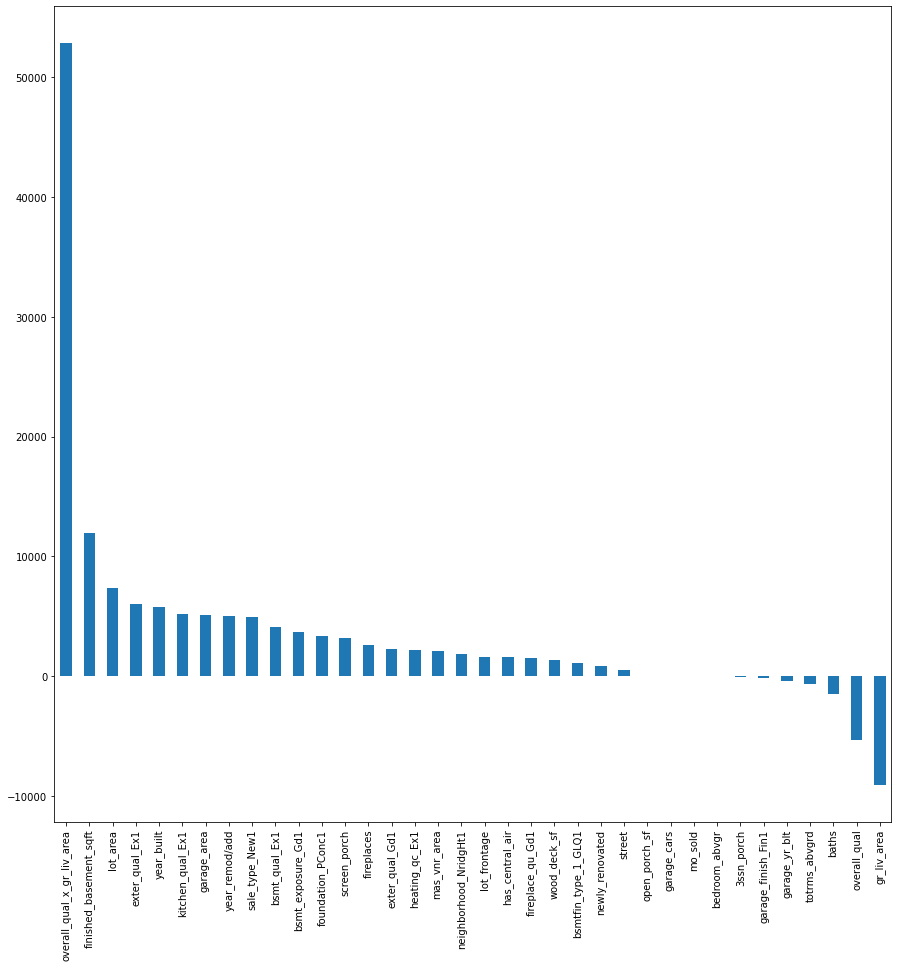

In [70]:
#to see how the coefficients have been regularized in lasso
pd.Series(lasso.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 15));

#### Removal of features which show negative values and only select those coefficient more than 600

In [71]:
#removing all features that have are below 600 coefficient in lasso
features = pd.Series(lasso.coef_, index=features).sort_values(ascending = True).where(lambda x : x>600).dropna().index.tolist()

In [72]:
len(features)

24

#### Final model selection

In [73]:
X = train_dummies[features]
y = train_dummies['saleprice']

In [74]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=42)

In [75]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_validate_scaled = ss.transform(X_validate)

In [76]:
lr = LinearRegression()

In [77]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [78]:
lasso = LassoCV(n_alphas=200)

In [79]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [80]:
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [81]:
lasso.fit(X_train_scaled,y_train)

LassoCV(n_alphas=200)

In [82]:
ridge.alpha_

9.0

In [83]:
lasso.alpha_

69.3154918293907

In [84]:
#LR estimate RMSE
lr_RMSE_score = -cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
lr_RMSE_score

23908.067828881656

In [85]:
#ridge estimate RMSE
ridge_RMSE_score = -cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
ridge_RMSE_score

23910.85875190686

In [86]:
#lasso estimate RMSE
lasso_RMSE_score = -cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
lasso_RMSE_score

23935.118483093218

In [87]:
print("Training RMSE(LR) " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_scaled)))))
print("Testing RMSE(LR) " + str(np.sqrt(mean_squared_error(y_validate,lr.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (LR) " + str((lr_RMSE_score)))

Training RMSE(LR) 23233.37047377312
Testing RMSE(LR) 22835.41756945838
Estimate of Testing RMSE (LR) 23908.067828881656


In [88]:
print("Training RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_scaled)))))
print("Testing RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_validate,ridge.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (Ridge) " + str((ridge_RMSE_score)))

Training RMSE(Ridge) 23235.963702364854
Testing RMSE(Ridge) 22844.163181745054
Estimate of Testing RMSE (Ridge) 23910.85875190686


In [89]:
print("Training RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled)))))
print("Testing RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_validate,lasso.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (Lasso)" + str((lasso_RMSE_score)))

Training RMSE(Lasso) 23234.0217344182
Testing RMSE(Lasso) 22838.45426090254
Estimate of Testing RMSE (Lasso)23935.118483093218


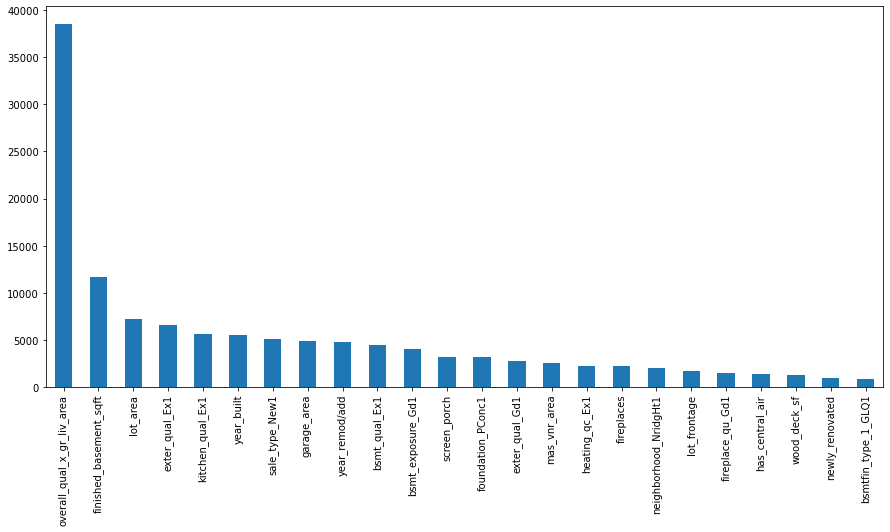

In [90]:
#regularization of final model coefficients in lasso
pd.Series(lasso.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 7));

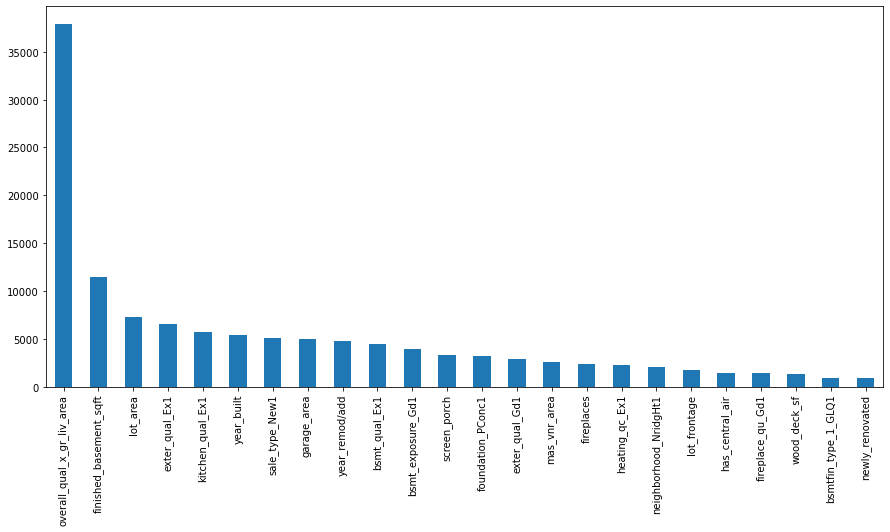

In [91]:
#regularization of final model coefficients in ridge
pd.Series(ridge.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 7));

### I proceed with Ridge model so that the predicting power of my dataset is spread out over the different features. It also has low bias and variance


### LINE assumption

#### Linearity

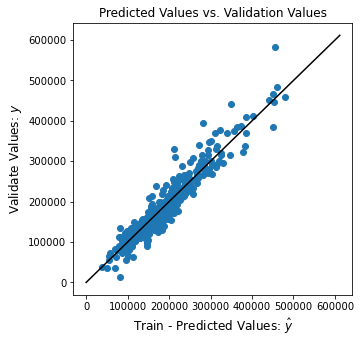

In [92]:
y_pred_ridge = ridge.predict(X_validate_scaled)

# Plot the model
plt.figure(figsize=(5,5))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred_ridge, y_validate)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Train - Predicted Values: $\hat{y}$", fontsize = 12)
plt.ylabel("Validate Values: $y$", fontsize = 12)
plt.title('Predicted Values vs. Validation Values', fontsize = 12);

From the plot, linearity is observed. it can be seen that the prediction will not be that accurate as the price goes higher. 

#### Indepedence

It's observed that the features are independent of each other

#### Normally distributed

In [93]:
r_residuals = y_validate - y_pred_ridge

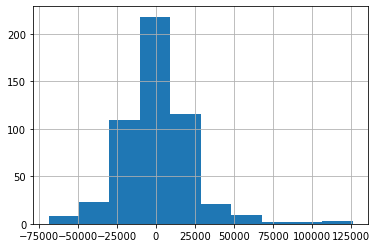

In [94]:
r_residuals.hist();

The histogram is not exactly normally distributed. The model's prediction wasn't that accurate as shown  by the residuals on the both tails of the distribution. 

#### Equal Variance of Residuals

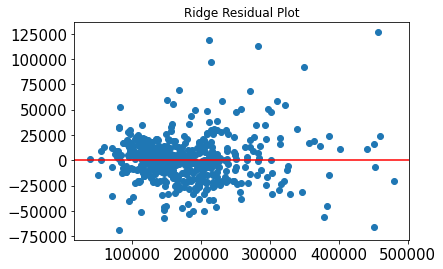

In [95]:
plt.scatter(y_pred_ridge, r_residuals);
plt.axhline(0, color='r');
plt.title("Ridge Residual Plot");
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

The variance of residuals are not equal. Similar to the scatter plot, it shows that the prediction will not be accurate when the model is trying to predict for higher values. However, these models used are linear regression and obviously there will be limitation. 

#### Kaggle Dataframe preparation

In [96]:
X_kaggle = test_dummies[features]

In [97]:
X_train = train_dummies[features]

In [98]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_kaggle_scaled = ss.transform(X_kaggle)

In [99]:
test_predictions = ridge.predict(X_kaggle_scaled)
submit_df = pd.DataFrame(test['id'])
submit_df['saleprice'] = test_predictions

In [100]:
submit_df.rename(columns={"id": "Id", "saleprice": "SalePrice"})

,Id,SalePrice
0,2658,138614.627976
1,2718,150631.587249
2,2414,236153.083533
3,1989,111046.935819
4,625,170105.398647
...,...,...
873,1662,189671.951563
874,1234,216632.525654
875,1373,136746.404304
876,1672,118269.297081


In [101]:
submit_df.to_csv('../final_predictions.csv', index=False)

#### Kaggle score: 25051.82667

### 9. Conclusions & Recommendations

In [102]:
# to list out all the coefficients
pd.Series(ridge.coef_, index=features).sort_values(ascending = False)

overall_qual_x_gr_liv_area    37855.672658
finished_basement_sqft        11491.099361
lot_area                       7283.318298
exter_qual_Ex1                 6608.730034
kitchen_qual_Ex1               5740.556835
year_built                     5390.122507
sale_type_New1                 5078.817099
garage_area                    4971.165490
year_remod/add                 4760.569480
bsmt_qual_Ex1                  4441.021635
bsmt_exposure_Gd1              3995.081553
screen_porch                   3273.652301
foundation_PConc1              3241.394299
exter_qual_Gd1                 2878.321018
mas_vnr_area                   2634.932170
fireplaces                     2427.371087
heating_qc_Ex1                 2271.135562
neighborhood_NridgHt1          2036.169025
lot_frontage                   1736.092812
has_central_air                1432.577076
fireplace_qu_Gd1               1428.134526
wood_deck_sf                   1384.176471
bsmtfin_type_1_GLQ1             965.061941
newly_renov

#### In conclusion, in order to sell at higher price for home improvement, we have to choose the features where we can change which are the categorical features as we can't increase the lot area and change the built year. 

These are the features* to look into when it comes to home improvement:

1. Excellent exterior quality $6608 increase in sale price

2. Excellent kitchen quality results in $5740 increase in sale price

3. Excellent basement quality results in $4441 increase in sale price

4. Good basement exposure results in $3995 increase in sale price

5. Good quality of materials used on exterior results in $2878 increase in sale price

6. Having a fireplace results in $2427 increase in sale price

7. Excellent heating quality & condition results in $2271 increase in sale price

8. Having a central air results in $1432 increase in sale price

9. Having good quality of fireplace results in $1428 increase in sale price

10. Having Good living quarters for basement finished area results in $965 increase in sale price

11. Newly renovated properties results in $885 increase in sale price

*Assume that other features are constant

Besides, the neighbourhood which can be considered to buy is Northridge Heights as it can result in $2036 increase in sale price.